<a href="https://colab.research.google.com/github/Himanshu-1703/ML_Algorithms/blob/main/GD_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression


In [ ]:
import ipywidgets as widgets

In [ ]:
# generate the data

X, y = make_regression(n_samples=100,n_features=1,
                       n_informative=1,noise=75,
                       random_state=67)

print('The shape of X is ',X.shape)
print('The shape of y is ',y.shape)

The shape of X is  (100, 1)
The shape of y is  (100,)


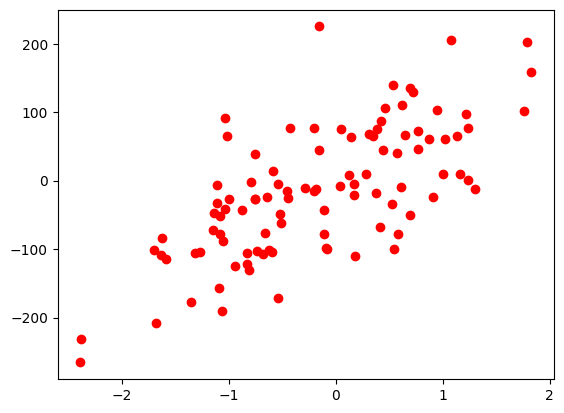

In [ ]:
# plot the scatter plot

plt.scatter(X,y,c='red')
plt.show()

In [ ]:
# make a linear_regression model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# fir the model
lr.fit(X,y)

# calculate the coef and the intercept value

print('The coef is ',lr.coef_[0])
print('The y intercept is',lr.intercept_)

The coef is  72.15444804653777
The y intercept is -2.712796517972686


In [ ]:
# calculate the mse value of linear regression

from sklearn.metrics import mean_squared_error as mse

print('The error is',mse(y,lr.predict(X)))

The error is 4661.371635976402


In [ ]:
# make a function for GD of the bias term

def gd_b(epochs,b,m=lr.coef_[0],l_rate=0.001):
    plt.scatter(X,y,c='red')
    
    y_pred = lr.predict(X)
    plt.plot(X,y_pred,label='OLS')
    
    pred = m * X.ravel() + b
    plt.plot(X,pred,label=f'b={b}')

    for i in range(epochs):
        slope = -2 * np.sum(y - (m * X.ravel()) - b)
        b = b - (l_rate * slope)

        # plot the line
        pred = m * X.ravel() + b
        plt.plot(X,pred,label=f'b={b}')

    plt.legend()
    plt.show()

    return b

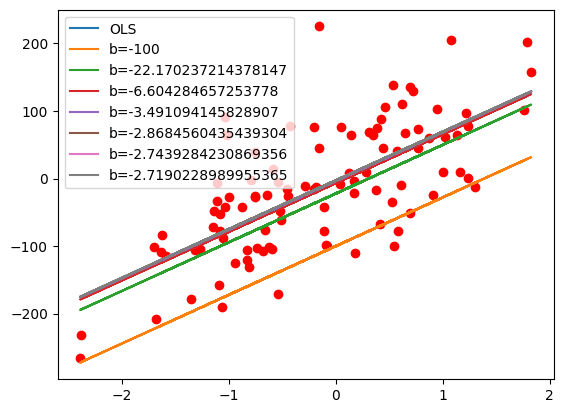

-2.7190228989955365

In [ ]:
gd_b(epochs=6,b=-100,l_rate=0.004)

## Batch Gradient Descent for Simple LR

In [ ]:
# make the GD regressor class

class GD_regressor:

    def __init__(self,epochs,l_rate,b=0,m=1):
        self.epochs = epochs
        self.l_rate = l_rate
        self.b = b
        self.m = m
        self.b_list = []
        self.m_list = []


    def fit(self,X,y):
        for i in range(self.epochs):
            y_pred = self.m * X.ravel() + self.b
            loss = np.mean(np.square(y - y_pred))

            print(f'The mean loss is {loss} and the value of m is {self.m} and b is {self.b}')
            self.b_list.append(self.b)
            self.m_list.append(self.m)

            # update for m
            slope_m = -2 * np.sum((y - (self.m * X.ravel()) - self.b) * X.ravel())
            self.m = self.m - (self.l_rate * slope_m)

            # update for b
            slope_b = -2 * np.sum(y - (self.m * X.ravel()) - self.b)
            self.b = self.b - (self.l_rate * slope_b)

        return self.m,self.b

In [ ]:
gd_reg = GD_regressor(epochs=20,l_rate=0.003,b=-500,m=1)

In [ ]:
gd_reg.fit(X,y)

The mean loss is 244477.20403182547 and the value of m is 1 and b is -500
The mean loss is 47970.95431075886 and the value of m is -11.946925455279823 and b is -210.1033847513068
The mean loss is 14020.972439345902 and the value of m is 11.08501443944772 and b is -91.82358785026699
The mean loss is 6981.727655322182 and the value of m is 34.00577658107182 and b is -42.20172274314161
The mean loss is 5281.165581206275 and the value of m is 49.95411554249557 and b is -20.745708709271042
The mean loss is 4832.022286788206 and the value of m is 59.733725837934664 and b is -11.177717409932393
The mean loss is 4708.744440660528 and the value of m is 65.36894362430924 and b is -6.782605623762178
The mean loss is 4674.5129091497365 and the value of m is 68.50338656321215 and b is -4.7086728523895856
The mean loss is 4665.004217824405 and the value of m is 70.20947631202273 and b is -3.7071606190386452
The mean loss is 4662.3718996561565 and the value of m is 71.12527470258229 and b is -3.21426

(72.15362586489503, -2.713153557415137)

## Batch Gradient Descent for Multiple Linear regression

In [ ]:
# generate the data

X, y = make_regression(n_samples=500,n_features=10,
                       n_informative=7,noise=45,
                       random_state=43)

print('The shape of X is ',X.shape)
print('The shape of y is ',y.shape)

The shape of X is  (500, 10)
The shape of y is  (500,)


In [ ]:
# do the train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=32)

print('The shape of X_train is ',X_train.shape)
print('The shape of X_test is ',X_test.shape)

The shape of X_train is  (400, 10)
The shape of X_test is  (100, 10)


In [ ]:
from sklearn.metrics import r2_score
# apply linear regression on the data

lin_reg = LinearRegression()

# fit on the data
lin_reg.fit(X_train,y_train)

# predict on the data
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# calculate the r2 scores

print('The score for the train data is ',r2_score(y_train,y_pred_train))
print('The score for the test data is ',r2_score(y_test,y_pred_test))

The score for the train data is  0.9558375853500863
The score for the test data is  0.9442814350001307


In [ ]:
# print the coef and the intercept

print(lin_reg.coef_)
print(lin_reg.intercept_)

[68.69529421 83.74719169 98.50121013 98.09371566 56.1305532   1.54053435
  0.20693515 55.24271983 71.11679176 -2.19434225]
-1.2219975651593629


In [ ]:
# create the Batch GD for Multiple LR

class Batch_GD:

    def __init__(self,learning_rate=0.01,epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.epochs = epochs
        self.learning_rate = learning_rate

    def fit(self,X,y):
        # initialize the intercept
        self.intercept_ = 0

        # initialize the coef
        self.coef_ = np.ones(shape=X.shape[1])

        # update params after every epoch
        for i in range(self.epochs):
            #hyper_plane = coef * X + intercept
            y_pred = np.dot(X,self.coef_) + self.intercept_
            resid = y - y_pred

            # update the coef
            coef_der = (-2 * np.dot(resid,X)) / X.shape[0]
            self.coef_ = self.coef_ - (self.learning_rate * coef_der)

            # update the intercept
            intercept_der = -2 * np.mean(resid)
            self.intercept_ = self.intercept_ - (self.learning_rate * intercept_der)

        return self.coef_,self.intercept_

    def predict(self,X):
        pred = np.dot(X,self.coef_) + self.intercept_
        return pred

In [ ]:
bgd = Batch_GD(learning_rate=0.03,epochs=200)

In [ ]:
bgd.fit(X_train,y_train)

(array([68.66948775, 83.75431853, 98.48401464, 98.08097834, 56.12914158,
         1.5286027 ,  0.21662642, 55.22806529, 71.11322373, -2.1967868 ]),
 -1.2103746104522124)

In [ ]:
# predict on the data
y_pred_train = bgd.predict(X_train)
y_pred_test = bgd.predict(X_test)

# calculate the r2 scores

print('The score for the train data is ',r2_score(y_train,y_pred_train))
print('The score for the test data is ',r2_score(y_test,y_pred_test))

The score for the train data is  0.9558375579158611
The score for the test data is  0.9442958785184765


## Stochastic gradient Descent

In [ ]:
from sklearn.metrics import r2_score
# apply linear regression on the data

lin_reg = LinearRegression()

# fit on the data
lin_reg.fit(X_train,y_train)

# predict on the data
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# calculate the r2 scores

print('The score for the train data is ',r2_score(y_train,y_pred_train))
print('The score for the test data is ',r2_score(y_test,y_pred_test))

The score for the train data is  0.9558375853500863
The score for the test data is  0.9442814350001307


In [ ]:
# print the coef and the intercept

print(lin_reg.coef_)
print(lin_reg.intercept_)

[68.69529421 83.74719169 98.50121013 98.09371566 56.1305532   1.54053435
  0.20693515 55.24271983 71.11679176 -2.19434225]
-1.2219975651593629


In [ ]:
# create the Stochastic GD for Multiple LR

class SGD_Regressor:

    def __init__(self,learning_rate=0.01,epochs=10):
        self.coef_ = None
        self.intercept_ = None
        self.epochs = epochs
        self.learning_rate = learning_rate

    def fit(self,X,y):
        # initialize the intercept
        self.intercept_ = 0

        # initialize the coef
        self.coef_ = np.ones(shape=X.shape[1])

        # number of rows in the data
        n = X.shape[0]
        
        for i in range(self.epochs):
            for j in range(n):
        
                # update params after every row 
                # select the random row of data
                id = np.random.randint(low=0,high=n)

                # calculate the y_pred for the row
                y_pred = np.dot(X[id],self.coef_) + self.intercept_
                resid = y[id] - y_pred

                # update the coef
                coef_der = -2 * (np.dot(resid,X[id]))
                self.coef_ = self.coef_ - (self.learning_rate * coef_der)

                # update the intercept
                intercept_der = -2 * resid
                self.intercept_ = self.intercept_ - (self.learning_rate * intercept_der)

        return self.coef_,self.intercept_

    def predict(self,X):
        pred = np.dot(X,self.coef_) + self.intercept_
        return pred

In [ ]:
sgd = SGD_Regressor(learning_rate=0.01,epochs=80)

sgd.fit(X_train,y_train)

(array([ 67.81273472,  88.73715062,  96.91705355, 100.56771678,
         60.10358089,  11.04206009,   4.55001223,  53.49403671,
         67.17602011,   2.14259092]),
 -3.4068760603092607)

In [ ]:
# predict on the data
y_pred_train = sgd.predict(X_train)
y_pred_test = sgd.predict(X_test)

# calculate the r2 scores

print('The score for the train data is ',r2_score(y_train,y_pred_train))
print('The score for the test data is ',r2_score(y_test,y_pred_test))

The score for the train data is  0.9512100889007701
The score for the test data is  0.9424609425309376


## Mini Batch Gradient Descent

In [ ]:
from sklearn.metrics import r2_score
# apply linear regression on the data

lin_reg = LinearRegression()

# fit on the data
lin_reg.fit(X_train,y_train)

# predict on the data
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# calculate the r2 scores

print('The score for the train data is ',r2_score(y_train,y_pred_train))
print('The score for the test data is ',r2_score(y_test,y_pred_test))

The score for the train data is  0.9558375853500863
The score for the test data is  0.9442814350001307


In [ ]:
# print the coef and the intercept

print(lin_reg.coef_)
print(lin_reg.intercept_)

[68.69529421 83.74719169 98.50121013 98.09371566 56.1305532   1.54053435
  0.20693515 55.24271983 71.11679176 -2.19434225]
-1.2219975651593629


In [ ]:
# create the Mini Batch GD for Multiple LR

class MGD_Regressor:

    def __init__(self,batch_size=32,learning_rate=0.01,epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self,X,y):

        # initiate the intercept
        self.intercept_ = 0

        # initiate the coef
        self.coef_ = np.ones(shape=X.shape[1])

        # determine the number of batches
        batch = int(X.shape[0] / self.batch_size)

        for i in range(self.epochs):
            for j in range(batch):
                
                # get the index of the data
                idx = np.random.randint(low=0,high=X.shape[0],size=self.batch_size)
                
                # calculate the y_pred
                y_pred = (np.dot(X[idx],self.coef_)) + self.intercept_
                resid = y[idx] - y_pred
                
                # update the coef
                coef_der = (-2 * np.dot(resid,X[idx])) / self.batch_size
                self.coef_ = self.coef_ - (self.learning_rate * coef_der)

                # update the intercept
                inter_der = -2 * np.mean(resid)
                self.intercept_ = self.intercept_ - (self.learning_rate * inter_der)

                return self.coef_,self.intercept_

    def predict(self,X):
        pred = (np.dot(X,self.coef_)) + self.intercept_
        return pred

In [ ]:
mgd = MGD_Regressor(learning_rate=0.3,epochs=3000,batch_size=150)

In [ ]:
mgd.fit(X_train,y_train)

(array([19.2117269 , 72.62381229, 57.01981775, 42.75930791, 37.82803707,
        -1.93492891, -2.16213008, 33.08852086, 37.17545285,  4.52847924]),
 15.119264548661512)

In [ ]:
# predict on the data
y_pred_train = mgd.predict(X_train)
y_pred_test = mgd.predict(X_test)

# calculate the r2 scores

print('The score for the train data is ',r2_score(y_train,y_pred_train))
print('The score for the test data is ',r2_score(y_test,y_pred_test))

The score for the train data is  0.768820727451506
The score for the test data is  0.6945003620249716
